In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.drop(['CustomerID','Gender'], axis=1, inplace=True)

In [6]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
#df = df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})
df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [ ]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
df.shape

(200, 3)

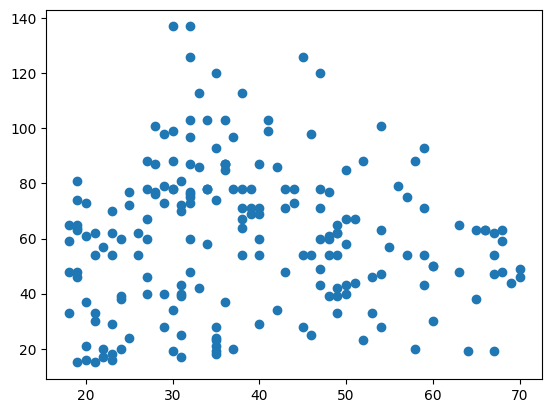

In [8]:
plt.scatter(df.age, df.income)

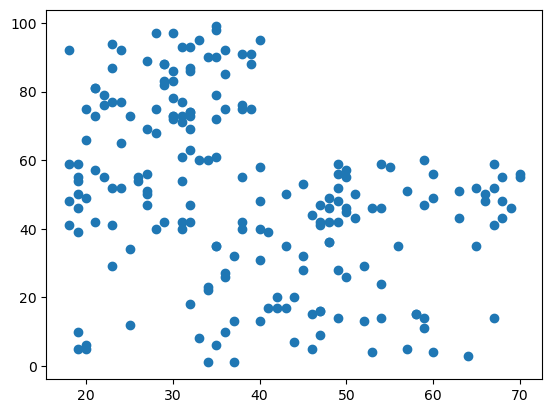

In [ ]:
plt.scatter(df.age, df.score)

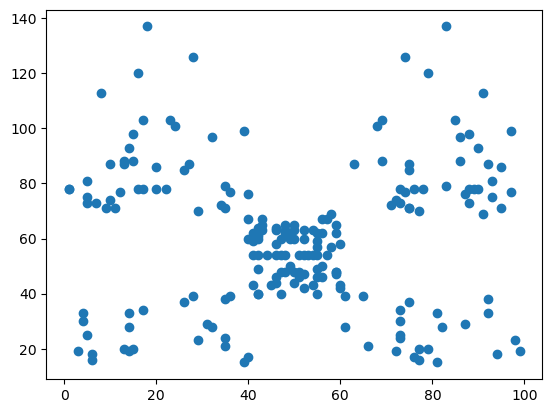

In [ ]:
plt.scatter(df.score, df.income)

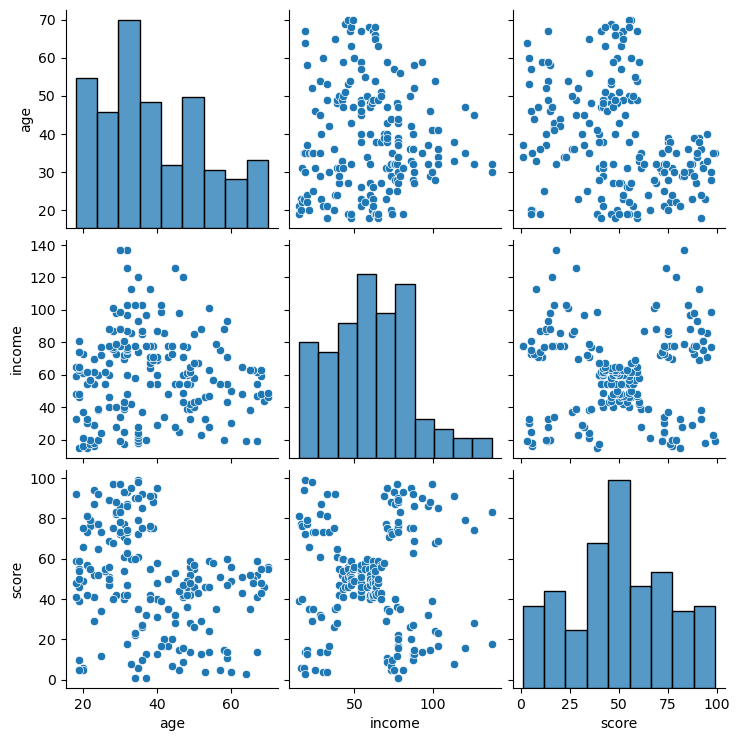

In [ ]:
import seaborn as sns
sns.pairplot(df[['age','income','score']])
plt.savefig('image.png')

# KMEANS CLUSTER

[KMeans Cluster](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

[Download this Cheatsheet](https://github.com/rashakil-ds/Top-Data-Science-AI-Book-Collection/blob/main/Other%20Docs/Clustering%20Algorithms.pdf)

Text(0, 0.5, 'Income in $1000')

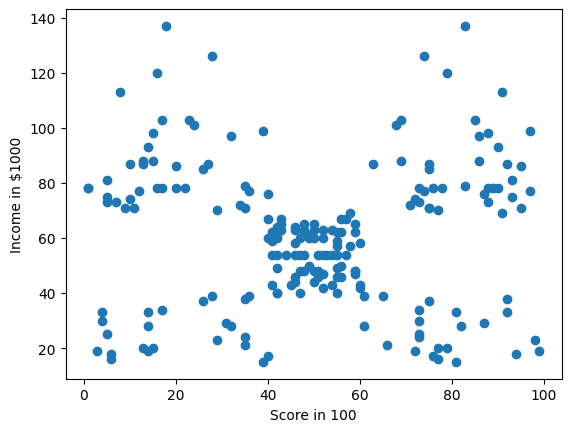

In [9]:
plt.scatter(df.score, df.income)
plt.xlabel('Score in 100')
plt.ylabel('Income in $1000')

In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans()

In [12]:
df.isnull().sum()

,0
age,0
income,0
score,0


In [13]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
df['score'].shape

(200,)

In [ ]:
df['income'].shape

(200,)

In [ ]:
#.!pip install threadpoolctl==3.1.0

In [19]:
km.fit(df[['score','income']])

KMeans()

In [20]:
km.predict(df[['score','income']])

array([7, 4, 3, 4, 7, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 7, 4, 7, 4, 7, 4,
       3, 4, 3, 4, 7, 0, 7, 4, 3, 4, 3, 4, 3, 4, 3, 4, 7, 4, 7, 4, 7, 0,
       7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 2, 1, 5, 1, 2, 1, 2, 1,
       5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 6, 1, 6, 6,
       6, 6], dtype=int32)

In [ ]:
df['defClusters'] = km.fit_predict(df[['score','income']])

In [ ]:
df.head()

,age,income,score,defClusters
0,19,15,39,3
1,21,15,81,0
2,20,16,6,3
3,23,16,77,0
4,31,17,40,3


In [ ]:
centroid1 = km.cluster_centers_
centroid1

array([[ 80.04761905,  25.0952381 ],
       [ 46.21428571,  63.95238095],
       [ 82.9375    ,  80.375     ],
       [ 19.52380952,  25.14285714],
       [ 22.        , 109.7       ],
       [ 51.24444444,  47.44444444],
       [ 12.68181818,  80.18181818],
       [ 78.42857143, 114.71428571]])

In [ ]:
df0 = df[df.defClusters==0]
df1 = df[df.defClusters==1]
df2 = df[df.defClusters==2]
df3 = df[df.defClusters==3]
df4 = df[df.defClusters==4]
df5 = df[df.defClusters==5]
df6 = df[df.defClusters==6]
df7 = df[df.defClusters==7]

In [ ]:
df0.shape

(21, 4)

In [ ]:
df6.shape

(22, 4)

Text(0, 0.5, 'Income in $1000')

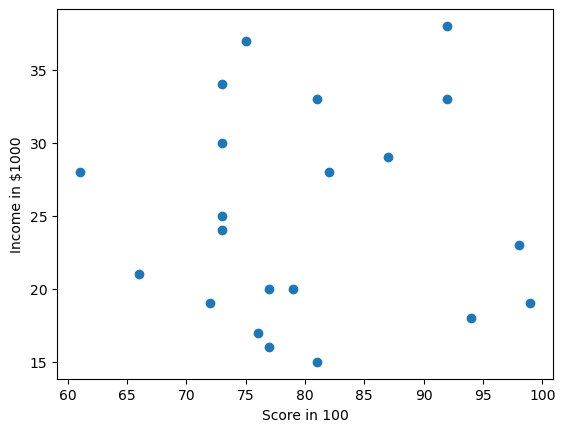

In [ ]:
plt.scatter(df0.score, df0.income)
plt.xlabel('Score in 100')
plt.ylabel('Income in $1000')

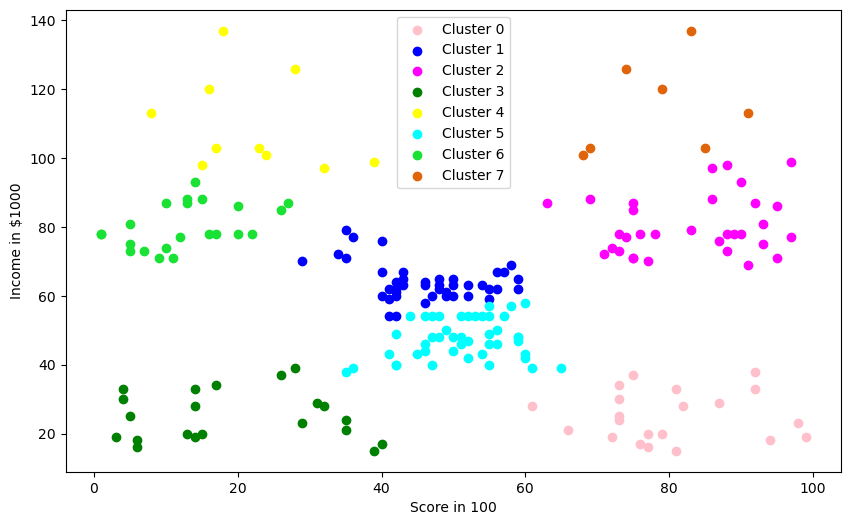

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(df0.score, df0.income, color='pink', label='Cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='Cluster 1')
plt.scatter(df2.score, df2.income, color='magenta', label='Cluster 2')
plt.scatter(df3.score, df3.income, color='green', label='Cluster 3')
plt.scatter(df4.score, df4.income, color='yellow', label='Cluster 4')
plt.scatter(df5.score, df5.income, color='cyan', label='Cluster 5')
plt.scatter(df6.score, df6.income, color='#19e234', label='Cluster 6')
plt.scatter(df7.score, df7.income, color='#e0650a', label='Cluster 7')

plt.xlabel('Score in 100')
plt.ylabel('Income in $1000')

plt.legend()

# Objective Function

Objective function of k-means clustering:
J = ∑_{i=1}^{k} ∑_{x ∈ C_i} ||x - μ_i||^2

Where:
- k is the number of clusters.
- C_i represents the i-th cluster.
- μ_i is the centroid (mean) of cluster C_i.
- ||x - μ_i||^2 represents the squared Euclidean distance between data point x and the centroid μ_i of its assigned cluster.


In [ ]:
wcss = []
cluster = range(1,15)

for k in cluster:
    clst = KMeans(n_clusters=k)
    clst.fit(df[['score','income']])
    wcss.append(clst.inertia_)  # inertia_ = calculate WCSS

In [ ]:
wcss

[269981.28,
 181665.82312925172,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37442.24745037571,
 30566.45113025186,
 25043.970949607225,
 21841.97825674864,
 19664.685196005543,
 17633.878680834292,
 15817.245013841313,
 14347.871204317504,
 13235.061468416643]

Text(0.5, 0, 'Number of Clusters')

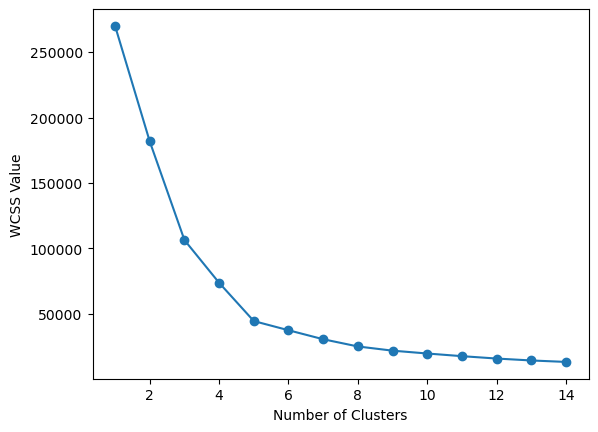

In [ ]:
plt.plot(range(1,15), wcss, marker='o')
plt.ylabel('WCSS Value')
plt.xlabel('Number of Clusters')

In [ ]:
# !pip install kneed

from kneed import KneeLocator as kn

In [ ]:
kl = kn(cluster, wcss, direction='decreasing', curve='convex')

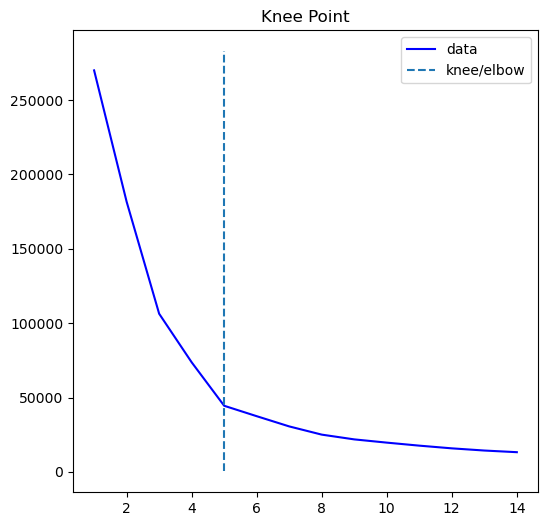

In [ ]:
kl.plot_knee()

In [ ]:
kl.knee

5

# After Optimizinf KMeans Cluster

In [ ]:
km = KMeans(n_clusters=5)
df['defClusters'] = km.fit_predict(df[['score','income']])

In [ ]:
df.head()

,age,income,score,defClusters,cluster2
0,19,15,39,4,4
1,21,15,81,2,2
2,20,16,6,4,4
3,23,16,77,2,2
4,31,17,40,4,4


In [ ]:
cen = km.cluster_centers_

In [ ]:
cen

array([[49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783]])

In [ ]:
df0 = df[df.defClusters==0]
df1 = df[df.defClusters==1]
df2 = df[df.defClusters==2]
df3 = df[df.defClusters==3]
df4 = df[df.defClusters==4]

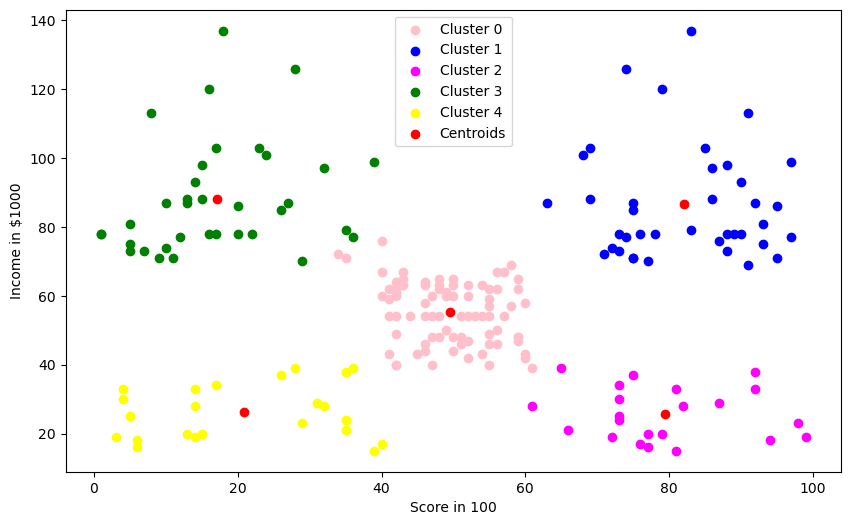

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(df0.score, df0.income, color='pink', label='Cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='Cluster 1')
plt.scatter(df2.score, df2.income, color='magenta', label='Cluster 2')
plt.scatter(df3.score, df3.income, color='green', label='Cluster 3')
plt.scatter(df4.score, df4.income, color='yellow', label='Cluster 4')

plt.scatter(cen[:,0], cen[:,1], color='red', label='Centroids')

plt.xlabel('Score in 100')
plt.ylabel('Income in $1000')

plt.legend()